In [1]:
# import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp
from statsmodels.stats.proportion import proportions_ztest
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

import os

path = os.getcwd()
os.chdir(f"{path}")

In [2]:
# import necessary data

result = pd.read_csv("../Data/result.csv")
paperdata = pd.read_csv("../Data/paperdata.csv")
primdata = pd.read_csv("../Data/primdata.csv")
lastdata = pd.read_csv("../Data/lastdata.csv")

# Statistical Analyses

## Basic Statistics

In [3]:
print("Total papers: ", result.doi.nunique())
print("Papers with gender info: ", paperdata.doi.nunique())
print("Papers with primary gender info: ", primdata.doi.nunique())
print("Papers with last gender info: ", lastdata.doi.nunique())

Total papers:  541448
Papers with gender info:  375736
Papers with primary gender info:  273016
Papers with last gender info:  288395


In [4]:
print("Oldest paper: ", paperdata.year.min())
print("Newest paper: ", paperdata.year.max())
print("Number of journal categories: ", paperdata.journal.nunique())

Oldest paper:  1893
Newest paper:  2009
Number of journal categories:  11


In [5]:
print("Total authors: ", paperdata.id.nunique())
print("Total men authors: ", paperdata.query('gender == "male"').id.nunique())
print("Total women authors: ", paperdata.query('gender == "female"').id.nunique())

Total authors:  120776
Total men authors:  103014
Total women authors:  17762


In [6]:
# journal query condition

s = "PRA"

print(f"Total {s} papers: ",
      result[result['journal'] == s].doi.nunique())
print(f"{s} papers with gender info: ",
      paperdata[paperdata['journal'] == s].doi.nunique())

df = primdata[primdata['journal'] == s]
print("")
print(f"{s} papers with primary gender info: ", df.doi.nunique())
print(f"{s} papers written by primary man author: ", len(df[df['gender']=='male']))
print(f"{s} papers written by primary woman author: ", len(df[df['gender']=='female']))

df2 = lastdata[lastdata['journal'] == s]
print("")
print(f"{s} papers with last gender info: ", df2.doi.nunique())
print(f"{s} papers written by last man author: ", len(df2[df2['gender']=='male']))
print(f"{s} papers written by last woman author: ", len(df2[df2['gender']=='female']))

Total PRA papers:  65170
PRA papers with gender info:  45061

PRA papers with primary gender info:  33687
PRA papers written by primary man author:  29780
PRA papers written by primary woman author:  3907

PRA papers with last gender info:  35139
PRA papers written by last man author:  32034
PRA papers written by last woman author:  3105


In [7]:
# PACS query condition

pacs = 8

print(f"Total PACS {pacs}0 papers: ",
      result[result[f'pacs{pacs}0'] == 1].doi.nunique())
print(f"PACS {pacs}0 papers with gender info: ",
      paperdata[paperdata[f'pacs{pacs}0'] == 1].doi.nunique())

df = primdata[primdata[f'pacs{pacs}0'] == 1]
print("")
print(f"PACS {pacs}0 papers with primary gender info: ", df.doi.nunique())
print(f"PACS {pacs}0 papers written by primary man author: ", len(df[df['gender']=='male']))
print(f"PACS {pacs}0 papers written by primary woman author: ", len(df[df['gender']=='female']))

df2 = lastdata[lastdata[f'pacs{pacs}0'] == 1]
print("")
print(f"PACS {pacs}0 papers with last gender info: ", df2.doi.nunique())
print(f"PACS {pacs}0 papers written by last man author: ", len(df2[df2['gender']=='male']))
print(f"PACS {pacs}0 papers written by last woman author: ", len(df2[df2['gender']=='female']))

Total PACS 80 papers:  48558
PACS 80 papers with gender info:  32735

PACS 80 papers with primary gender info:  24676
PACS 80 papers written by primary man author:  21407
PACS 80 papers written by primary woman author:  3269

PACS 80 papers with last gender info:  25762
PACS 80 papers written by last man author:  23315
PACS 80 papers written by last woman author:  2447


### Alphabetically ordered papers and Author order analysis

In [8]:
# alphabetically ordered paper statistics

print("Total alphabetically ordered papers: ",
      len(result.query('is_alpha == True').drop_duplicates('doi')))

for i in range(10):
    print('')
    print(f"Total PACS {i}0 papers:", result.query(f'pacs{i}0 == 1').doi.nunique())
    print("Alphabetically ordered:",result.query(
        f'is_alpha == True & pacs{i}0 == 1').doi.nunique())
    print("Proportion of alpha papers:", format(result.query(
        f'is_alpha == True & pacs{i}0 == 1').doi.nunique()/result.query(
        f'pacs{i}0 == 1').doi.nunique() * 100, ".2f"),'%')

Total alphabetically ordered papers:  19159

Total PACS 00 papers: 104571
Alphabetically ordered: 4141
Proportion of alpha papers: 3.96 %

Total PACS 10 papers: 55650
Alphabetically ordered: 6088
Proportion of alpha papers: 10.94 %

Total PACS 20 papers: 35026
Alphabetically ordered: 1877
Proportion of alpha papers: 5.36 %

Total PACS 30 papers: 42794
Alphabetically ordered: 1088
Proportion of alpha papers: 2.54 %

Total PACS 40 papers: 57467
Alphabetically ordered: 1558
Proportion of alpha papers: 2.71 %

Total PACS 50 papers: 12330
Alphabetically ordered: 296
Proportion of alpha papers: 2.40 %

Total PACS 60 papers: 89689
Alphabetically ordered: 1912
Proportion of alpha papers: 2.13 %

Total PACS 70 papers: 155517
Alphabetically ordered: 2686
Proportion of alpha papers: 1.73 %

Total PACS 80 papers: 48558
Alphabetically ordered: 1007
Proportion of alpha papers: 2.07 %

Total PACS 90 papers: 26601
Alphabetically ordered: 1885
Proportion of alpha papers: 7.09 %


In [9]:
# Author order categorization

# filter out alphabetically ordered papers
nonalpha = paperdata.query('is_alpha == False')

first_author = nonalpha.query('order == 1').reset_index(drop=True)
second_author = nonalpha.query('order == 2 & numAuthor != 2').reset_index(drop=True)
middle_author = nonalpha.query('order >= 3 & order != numAuthor').reset_index(drop=True)
last_author = nonalpha.query('order == numAuthor & order != 1').reset_index(drop=True)

authors = [first_author, second_author, middle_author, last_author]
authors_name = ['first', 'second', 'middle', 'last']

In [10]:
# author order statistics

for i in range(4):
    ao_m, ao_w = 0, 0
    for j in range(len(authors[i])):
        if authors[i]['gender'][j] == 'male':
            ao_m += 1
        elif authors[i]['gender'][j] == 'female':
            ao_w += 1
    print('')
    print(f"Total {authors_name[i]} authors: ", len(authors[i]))
    print(f"Total {authors_name[i]} men authors: ", ao_m)
    print(f"{authors_name[i]} men authors' proportion: ", format(
        ao_m/len(nonalpha.query('gender == "male"')), ".4f"))
    print(f"Total {authors_name[i]} women authors: ", ao_w)
    print(f"{authors_name[i]} women authors' proportion: ", format(
        ao_w/len(nonalpha.query('gender == "female"')), ".4f"))
    zscore, pval = proportions_ztest([ao_m, ao_w],
        [len(nonalpha.query('gender == "male"')), len(nonalpha.query('gender == "female"'))])
    print('z-score:', format(zscore, ".2f"))
    print('p-value:', '{:g}'.format(float('{:.3g}'.format(pval))))


Total first authors:  273016
Total first men authors:  242290
first men authors' proportion:  0.3275
Total first women authors:  30726
first women authors' proportion:  0.3437
z-score: -9.74
p-value: 1.99e-22

Total second authors:  131612
Total second men authors:  116326
second men authors' proportion:  0.1572
Total second women authors:  15286
second women authors' proportion:  0.1710
z-score: -10.63
p-value: 2.09e-26

Total middle authors:  198075
Total middle men authors:  174786
middle men authors' proportion:  0.2363
Total middle women authors:  23289
middle women authors' proportion:  0.2605
z-score: -16.07
p-value: 4.15e-58

Total last authors:  226463
Total last men authors:  206374
last men authors' proportion:  0.2790
Total last women authors:  20089
last women authors' proportion:  0.2247
z-score: 34.37
p-value: 6.07e-259


### Participation Growth

In [11]:
# Observe number of authors by year, separated by gender

tdata = paperdata.copy()
tdata.sort_values("id", inplace = True)
tdata.drop_duplicates(subset = ["id", "year"],
                         keep = "first", inplace = True)

m_tdata = tdata[tdata['gender'] == 'male'].groupby(['year'])['year'].count()
w_tdata = tdata[tdata['gender'] == 'female'].groupby(['year'])['year'].count()

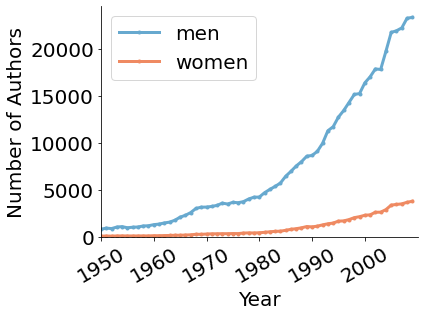

In [12]:
# Year vs. Number of Authors (Plot)

# Regular graph format throughout this paper
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Male authors
m_tdata.plot(style='.-',color='#67a9cf', lw=3)
# Female authors
w_tdata.plot(style='.-',color='#ef8a62', lw=3)

plt.legend(('men', 'women'), loc='upper left', fontsize=20)
plt.xticks(np.arange(1950, 2010, step=10), fontsize=20, rotation=30)
plt.xlabel('Year', fontsize=20)
plt.xlim(xmin=1950, xmax=2010)
plt.ylabel('Number of Authors', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymin=0)

plt.tight_layout()

## Calculating Productivity and Dropout Rates

### Productivity Comparison

In [13]:
# Creating a DataFrame with productivity calculated
prod = paperdata.copy().groupby(['id', 'gender']).agg({'year': [min, max, 'count']})

prod['career_age'] = prod['year']['max'] - prod['year']['min']
prod['prod'] = prod['year']['count'] / (prod['career_age'])

In [14]:
# what is the ratio of men / women authors with career age of 0?

ca_zero = prod[prod['career_age'] == 0]
ca_zero.sort_values([('year','count')], ascending=False).head()

# Separating the DataFrame by gender
prod_all_m = prod.copy().xs('male', level='gender').sort_values(
    by=['prod'],ascending=False, ignore_index=True)
prod_all_w = prod.copy().xs('female', level='gender').sort_values(
    by=['prod'],ascending=False)

ca_zero_m = ca_zero.copy().xs('male', level='gender').sort_values(
    by=['prod'],ascending=False, ignore_index=True)
ca_zero_w = ca_zero.copy().xs('female', level='gender').sort_values(
    by=['prod'],ascending=False)

# Career Age by gender
ca_all_m = prod_all_m.groupby(['career_age'])['career_age'].count()
ca_all_w = prod_all_w.groupby(['career_age'])['career_age'].count()

ca_zero_m = ca_zero_m.groupby(['career_age'])['career_age'].count()
ca_zero_w = ca_zero_w.groupby(['career_age'])['career_age'].count()

print("Proportion of men authors with CA 0: ", format(sum(ca_zero_m)/sum(ca_all_m) * 100, ".2f"), "%")
print("Proportion of women authors with CA 0: ", format(sum(ca_zero_w)/sum(ca_all_w) * 100, ".2f"), "%")

Proportion of men authors with CA 0:  39.94 %
Proportion of women authors with CA 0:  47.56 %


In [15]:
# exclude 0 career age
prod = prod[prod['career_age'] != 0]

prod.sort_values([('year','count')], ascending=False).head()

# Separating the DataFrame by gender
prod_m = prod.xs('male', level='gender').sort_values(
    by=['prod'],ascending=False, ignore_index=True)
prod_w = prod.xs('female', level='gender').sort_values(
    by=['prod'],ascending=False)

# Career Age by gender
ca_m = prod_m.groupby(['career_age'])['career_age'].count()
ca_w = prod_w.groupby(['career_age'])['career_age'].count()

In [16]:
# only for data extraction

menca = ca_m.to_frame(name = 'men_count')
menca.reset_index(inplace=True)

womenca = ca_w.to_frame(name = 'women_count')
womenca.reset_index(inplace=True)

ca_df = menca.merge(womenca, on='career_age', how='outer').fillna(0).sort_values('career_age')
ca_df = ca_df.astype(int)
ca_df.head()

,career_age,men_count,women_count
0,1,6301,1224
1,2,5432,1038
2,3,4542,793
3,4,3890,698
4,5,3373,562


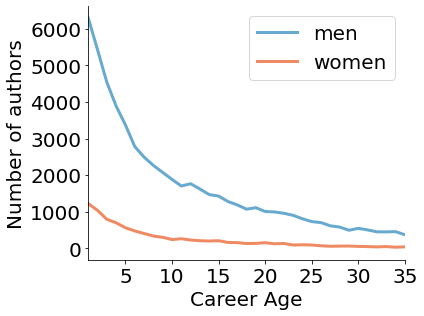

In [17]:
# Career age vs. Number of authors, separated by gender
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
ca_m.plot(color='#67a9cf', lw=3)
# Women authors
ca_w.plot(color='#ef8a62', lw=3)

plt.xticks(fontsize=20)
plt.xlim(1,35)
plt.yticks(fontsize=20)
plt.legend(['men', 'women'], loc='upper right', fontsize=20)
plt.xlabel('Career Age', fontsize=20)
plt.ylabel('Number of authors', fontsize=20)
plt.tight_layout()

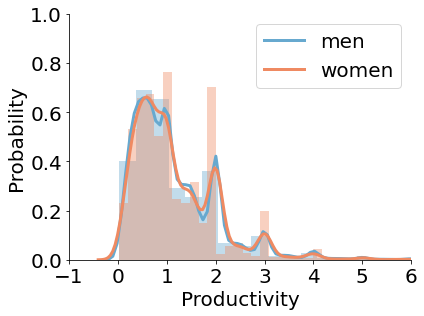

In [18]:
# Comparing PDFs

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

ax1 = sns.distplot(prod_m['prod'], ax=ax, label='male', color= '#67a9cf',kde_kws=dict(linewidth=3))
fit = ax1.get_lines()[0].get_data() # Getting the data from the plotted line
xfit, yfit = fit[0], fit[1]
ax1.legend()

ax2 = sns.distplot(prod_w['prod'], ax=ax, label='female', color= '#ef8a62',kde_kws=dict(linewidth=3))
fit = ax2.get_lines()[0].get_data() # Getting the data from the plotted line
xfit, yfit = fit[0], fit[1]
ax2.legend()

plt.legend(('men', 'women'), loc='upper right', fontsize=20)
plt.xlabel('Productivity', fontsize=20)
plt.xlim(xmin=-1, xmax=6)
plt.ylim(ymax=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Probability', fontsize=20)

plt.tight_layout()

In [19]:
# creating CDF data for productivity

cdf1=np.arange(len(prod_m))/float(len(prod_m)-1)
cdf2=np.arange(len(prod_w))/float(len(prod_w)-1)

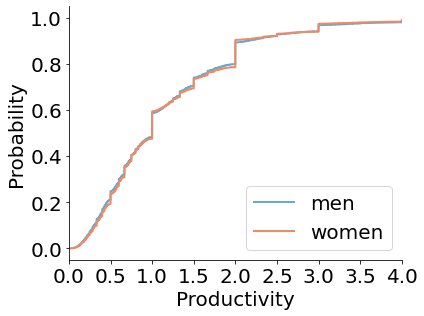

In [20]:
# Productivity CDF Plots
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
plt.plot(prod_m['prod'],1-cdf1, color='#67a9cf', lw=2)
# Women authors
plt.plot(prod_w['prod'],1-cdf2, color='#ef8a62', lw=2)

plt.xlabel('Productivity', fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(xmin=0, xmax=4)
plt.ylabel('Probability', fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['men', 'women'], loc='lower right', fontsize=20)
plt.tight_layout()

In [21]:
# Run K-S test to compare the productivity

print('Two-way K-S:', ks_2samp(prod_m['prod'], prod_w['prod']))
print('Greater K-S:', ks_2samp(prod_m['prod'], prod_w['prod'], alternative='greater'))
print('Less K-S:', ks_2samp(prod_m['prod'], prod_w['prod'], alternative='less'))

Two-way K-S: KstestResult(statistic=0.018302046295788743, pvalue=0.008711930714457616)
Greater K-S: KstestResult(statistic=0.018302046295788743, pvalue=0.004350112321953321)
Less K-S: KstestResult(statistic=0.011221541461513107, pvalue=0.12906919986376664)


We see greater difference in productivity in favor of men authors.

In [22]:
# find out where the greatest difference in productivity occurs

def ks_2samp_x(data1, data2, alternative="two-sided"):
    data1 = np.sort(data1)
    data2 = np.sort(data2)
    n1 = data1.shape[0]
    n2 = data2.shape[0]

    data_all = np.concatenate([data1, data2])
    # using searchsorted solves equal data problem
    cdf1 = np.searchsorted(data1, data_all, side='right') / n1
    cdf2 = np.searchsorted(data2, data_all, side='right') / n2
    cddiffs = cdf1 - cdf2
    minS = np.argmin(cddiffs)   # ks_2samp uses np.min or np.max respectively 
    maxS = np.argmax(cddiffs)   # now we get instead the index in data_all
    alt2Dvalue = {'less': minS, 'greater': maxS, 'two-sided': max(minS, maxS)}
    d_arg = alt2Dvalue[alternative]
    return data_all[d_arg]

print("The greatest difference in productivity occurs at:", 
      ks_2samp_x(prod_m['prod'], prod_w['prod'], alternative='greater'))

The greatest difference in productivity occurs at: 0.4909090909090909


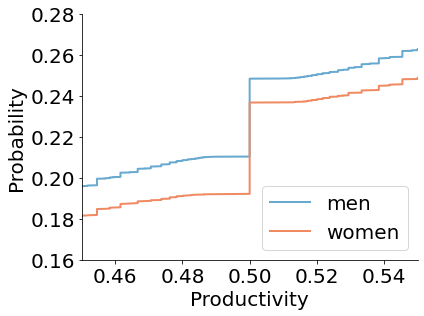

In [23]:
# Productivity CDF Plots
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
plt.plot(prod_m['prod'],1-cdf1, color='#67a9cf', lw=2)
# Women authors
plt.plot(prod_w['prod'],1-cdf2, color='#ef8a62', lw=2)

plt.xlabel('Productivity', fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(xmin=0, xmax=4)
plt.ylabel('Probability', fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['men', 'women'], loc='lower right', fontsize=20)
plt.tight_layout()

# Use the following xlim, ylim instead for zoomed-in plot
plt.xlim(xmin=0.45, xmax=0.55)
plt.ylim(ymin=0.16, ymax=0.28)
plt.tight_layout()

### Dropout Rate Comparison

In [24]:
# exclude authors who enter APS publication after 2004
# create scatterplot of dropout authors by career age

dropout = prod[prod['year']['min'] < 2004].groupby(
    ['gender', 'career_age'])['career_age'].count()

dropout_m = dropout['male'].sort_index(ascending=False)
dropout_w = dropout['female'].sort_index(ascending=False)

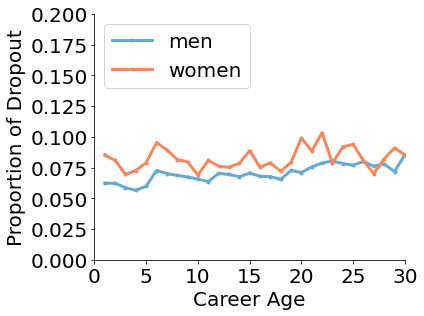

In [25]:
# Career Age vs. Proportion of Dropout (plot)

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
(dropout_m/dropout_m.cumsum()).iloc[::-1].plot(
    style='.-', color='#67a9cf', lw=3)
# Women authors
(dropout_w/dropout_w.cumsum()).iloc[::-1].plot(
    style='.-',color='#ef8a62', lw=3)

plt.legend(('men', 'women'), loc='upper left', fontsize=20)
plt.xlabel('Career Age', fontsize=20)
plt.xlim(0,30)
plt.ylabel('Proportion of Dropout', fontsize=20)
plt.ylim(0, 0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()

In [26]:
# dropout rate comparison

do_comparison = (dropout_w/dropout_w.cumsum() - dropout_m/dropout_m.cumsum())
do_comparison[:19].sort_values(ascending=False)[:5]

career_age
1    0.022800
6    0.022590
7    0.019358
5    0.019054
2    0.018596
Name: career_age, dtype: float64

### Career Age Analysis

In [27]:
# Set up DataFrames for Career Age vs. Average number of publications
# separated by gender

subdata = paperdata.copy().drop(['order','doi','numAuthor',
                                 'is_alpha','articleType','journal'],
                    axis=1).sort_values(by=['id', 'year'])
subdata["ca"] = subdata.groupby("id")["year"].transform(lambda x: x - x.min())

subdata_m = subdata[subdata['gender'] == 'male'].drop(
    ['gender', 'year'], axis=1).groupby(['id', 'ca']).size().to_frame(
    name='count').reset_index(level='id', drop=True).reset_index()

subdata_w = subdata[subdata['gender'] == 'female'].drop(
    ['gender', 'year'], axis=1).groupby(['id', 'ca']).size().to_frame(
    name='count').reset_index(level='id', drop=True).reset_index()

subdata_m = subdata_m.groupby("ca").agg(
    ['count', np.mean, np.std]).reset_index()
subdata_w = subdata_w.groupby("ca").agg(
    ['count', np.mean, np.std]).reset_index()

In [28]:
# Calculate standard error for the shaded area in plots

semlist1, semlist2 = [], []

for i in range(len(subdata_m)):
    semlist1.append(subdata_m["count"]['std'][i]/sqrt(subdata_m["count"]['count'][i]))
subdata_m['sem'] = semlist1

for i in range(len(subdata_w)):
    semlist2.append(subdata_w["count"]['std'][i]/sqrt(subdata_w["count"]['count'][i]))
subdata_w['sem'] = semlist2

# Append to the existing DataFrames
subdata_m = subdata_m.set_index('ca').reindex(range(
    subdata_m.ca.min(),subdata_m.ca.max()+1)).fillna(np.nan).reset_index()
subdata_w = subdata_w.set_index('ca').reindex(range(
    subdata_w.ca.min(),subdata_w.ca.max()+1)).fillna(np.nan).reset_index()

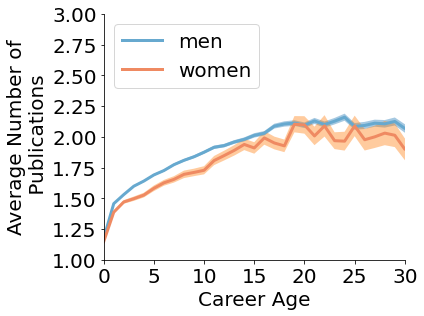

In [29]:
# Career age vs. Average number of publications (plot)

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
plt.plot(subdata_m.ca,subdata_m["count"]["mean"],"-",label="men",
         color='#67a9cf', lw=3)

# shading the SE area (man)
X  = np.linspace(min(subdata_m.ca),max(subdata_m.ca),subdata_m.ca.nunique())
plt.fill_between(X,
                 subdata_m["count"]["mean"] + subdata_m["sem"],
                 subdata_m["count"]["mean"] - subdata_m["sem"],
                 color='C0',alpha=.4,edgecolor="none")

# Women authors
plt.plot(subdata_w.ca,subdata_w["count"]["mean"],"-",label="women",
         color='#ef8a62', lw=3)

# shading the SE area (woman)
X  = np.linspace(min(subdata_w.ca),max(subdata_w.ca),subdata_w.ca.nunique())
plt.fill_between(X,
                 subdata_w["count"]["mean"] + subdata_w["sem"],
                 subdata_w["count"]["mean"] - subdata_w["sem"],
                 color='C1',alpha=.4,edgecolor="none")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Career Age",fontsize=20)
plt.ylabel("Average Number of\n Publications",fontsize=20)
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=1, ymax=3)
plt.legend(loc='upper left', fontsize=20)

plt.tight_layout()